<a href="https://colab.research.google.com/github/GhouI/RetailMarketAnalysis/blob/main/UniversityProjectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
dataset = pd.read_csv('retail_sales_dataset.csv')

Data Exploration

In [ ]:
#data types
print(dataset.dtypes)
#check for missing values
missing_values = dataset.isnull().sum()
#check for the percentage with the dataset missing values
missing_values_percentage = (dataset.isnull().sum() / len(dataset)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Missing Values Percentage': missing_values_percentage}))


In [ ]:
#Dataset Describing
print("Describing........")
print("dataset top", dataset.head())
print(dataset.describe())

dataset.hist(figsize=(10,8))  # Histogram of numerical features
plt.show()

for col in dataset.select_dtypes(include=["object","category"]).columns:
    print(f"Column: {col}")
    print(dataset[col].value_counts(), "\n")  # Counts for each category

Data Cleaning

In [8]:

gendre_label_encoder = LabelEncoder()
product_category_label_encoder = LabelEncoder()

cloned_dataset = dataset.copy();

cloned_dataset.drop('Customer ID', axis=1, inplace=True)
cloned_dataset.drop('Date', axis=1, inplace=True)
cloned_dataset['Age'] = (cloned_dataset['Age'] - cloned_dataset['Age'].mean()) / cloned_dataset['Age'].std()
cloned_dataset['Gender'] = gendre_label_encoder.fit_transform(cloned_dataset['Gender'])
cloned_dataset['Product Category'] = product_category_label_encoder.fit_transform(cloned_dataset['Product Category'])
cloned_dataset.drop('Price per Unit', axis=1, inplace=True)
cloned_dataset.drop('Quantity', axis=1, inplace=True)

cleaned_datasets = pd.DataFrame(cloned_dataset)
cleaned_datasets.to_csv('cleaned_dataset.csv', index=False)


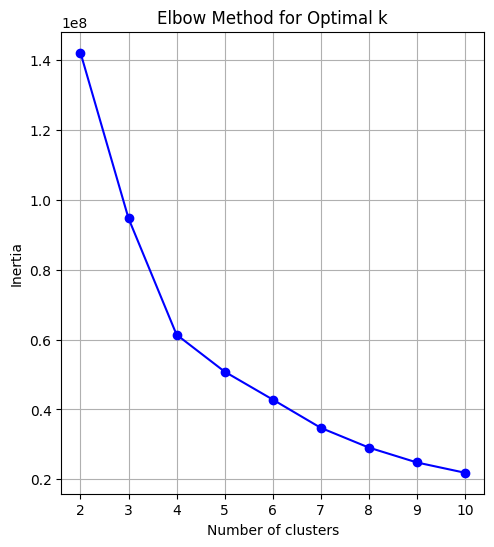

In [9]:
#finding the thing
inertia = []

krange = range(2,11)
for k in krange:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(cleaned_datasets)
  inertia.append(kmeans.inertia_)

  if k>=2:
    labels = kmeans.labels_


# Plot the Elbow Method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(krange, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)


# **Using K means Clustering**

In [ ]:
amount_of_clusters = 4
# Apply final K-means model with 4 clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cleaned_datasets)


# **Adding some visualisation**
